<a href="https://colab.research.google.com/github/MANIKANDAN2112/Machine-learning-Vehicle-predictive-maintenance/blob/main/Vehicle_predictive_maintenance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

from sklearn.neighbors import NearestCentroid
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
import lightgbm as lgb
import xgboost as xgb
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score


In [ ]:
pip install lazypredict


In [ ]:

import lazypredict
from lazypredict.Supervised import LazyClassifier


In [ ]:
pip install feature_engine


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.3/344.3 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 19.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.2.1 which is incompatible.


In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Step 1: Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Engine_data/Engine_Condition Prediction.csv')



In [ ]:
# Step 2: dataset understanding
df.info()
### pd.options.display.max_columns = None
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
 6   Engine Condition  19535 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.0 MB


,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
count,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000
mean,791.239263,3.303775,6.655615,2.335369,77.643420,78.427433,0.630509
std,267.611193,1.021643,2.761021,1.036382,3.110984,6.206749,0.482679
min,61.000000,0.003384,0.003187,0.002483,71.321974,61.673325,0.000000
25%,593.000000,2.518815,4.916886,1.600466,75.725990,73.895421,0.000000
50%,746.000000,3.162035,6.201720,2.166883,76.817350,78.346662,1.000000
75%,934.000000,4.055272,7.744973,2.848840,78.071691,82.915411,1.000000
max,2239.000000,7.265566,21.138326,7.478505,89.580796,195.527912,1.000000


In [ ]:
# Missing Data
# Checking Null Values
df.isnull().sum()


Engine rpm          0
Lub oil pressure    0
Fuel pressure       0
Coolant pressure    0
lub oil temp        0
Coolant temp        0
Engine Condition    0
dtype: int64

# New Section

In [ ]:
# all coulmns are numerical data
# 'Engine Condition' is binary data and target column can be ignored for EDA
data = df.drop('Engine Condition', axis = 1)



In [ ]:

# Step 3: First Moment Business Decision / Measures of Central Tendency
data_mean = data.mean()
print('column wise mean values \n',data_mean)


column wise mean values 
 Engine rpm          791.239263
Lub oil pressure      3.303775
Fuel pressure         6.655615
Coolant pressure      2.335369
lub oil temp         77.643420
Coolant temp         78.427433
dtype: float64


In [ ]:
data_median = data.median()
print('column wise median values \n',data_median)



column wise median values 
 Engine rpm          746.000000
Lub oil pressure      3.162035
Fuel pressure         6.201720
Coolant pressure      2.166883
lub oil temp         76.817350
Coolant temp         78.346662
dtype: float64


In [ ]:
# Step 4: Second Moment Business Decision / Measures of Dispersion
data_stdev = data.std()
print('column wise Standard Deviation values \n',data_stdev)



column wise Standard Deviation values 
 Engine rpm          267.611193
Lub oil pressure      1.021643
Fuel pressure         2.761021
Coolant pressure      1.036382
lub oil temp          3.110984
Coolant temp          6.206749
dtype: float64


In [ ]:
data_variance = data.var()
print('column wise variance values \n',data_variance)



column wise variance values 
 Engine rpm          71615.750675
Lub oil pressure        1.043754
Fuel pressure           7.623235
Coolant pressure        1.074088
lub oil temp            9.678221
Coolant temp           38.523737
dtype: float64


In [ ]:

# 'Lub oil pressure' and 'Coolant pressure' has very low variance and
# wont impact on training model and can be dropped
data = data.drop(['Lub oil pressure', 'Coolant pressure'], axis = 1)

# Step 5: Third Moment Business Decision / Skewness
data_skew = data.skew()
print('column wise skewness values \n',data_skew)



column wise skewness values 
 Engine rpm       0.934932
Fuel pressure    1.216387
lub oil temp     1.496375
Coolant temp     0.404451
dtype: float64


In [ ]:
# all columns are positively with `Coolant temp` has relatively low skewness

# Step 6: Fourth Moment Business Decision / Kurtosis
data_kurt = data.kurt()
print('column wise skewness values \n',data_kurt)



column wise skewness values 
 Engine rpm       0.936921
Fuel pressure    2.452666
lub oil temp     1.749363
Coolant temp     5.880549
dtype: float64


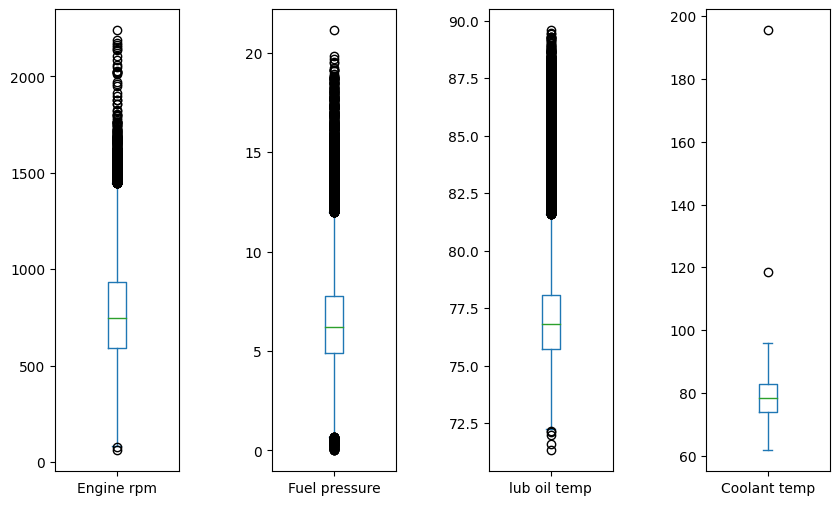

In [ ]:
# Step 7: Data Visualization
import matplotlib.pyplot as plt
data.plot(kind = 'box', subplots = True, sharey = False, figsize = (10, 6))
# increase spacing between subplots
plt.subplots_adjust(wspace = 0.75) # ws is the width of the padding between subplots, as a fraction of the average Axes width.
plt.show()

# Outliers observed


In [ ]:
# Step 8: Winsorization for outlier treatment
from feature_engine.outliers import Winsorizer

winsor = Winsorizer(capping_method = 'iqr', # choose  IQR rule boundaries or gaussian for mean and std
                          tail = 'both', # cap left, right or both tails
                          fold = 1.5,
                          variables = list(data.columns))

winsor


Winsorizer(capping_method='iqr', fold=1.5, tail='both',
           variables=['Engine rpm', 'Fuel pressure', 'lub oil temp',
                      'Coolant temp'])

In [ ]:
import joblib
clean = winsor.fit(data)

# Save winsorizer model

joblib.dump(clean, 'winsor')

cleandata = pd.DataFrame(clean.transform(data), columns = data.columns)



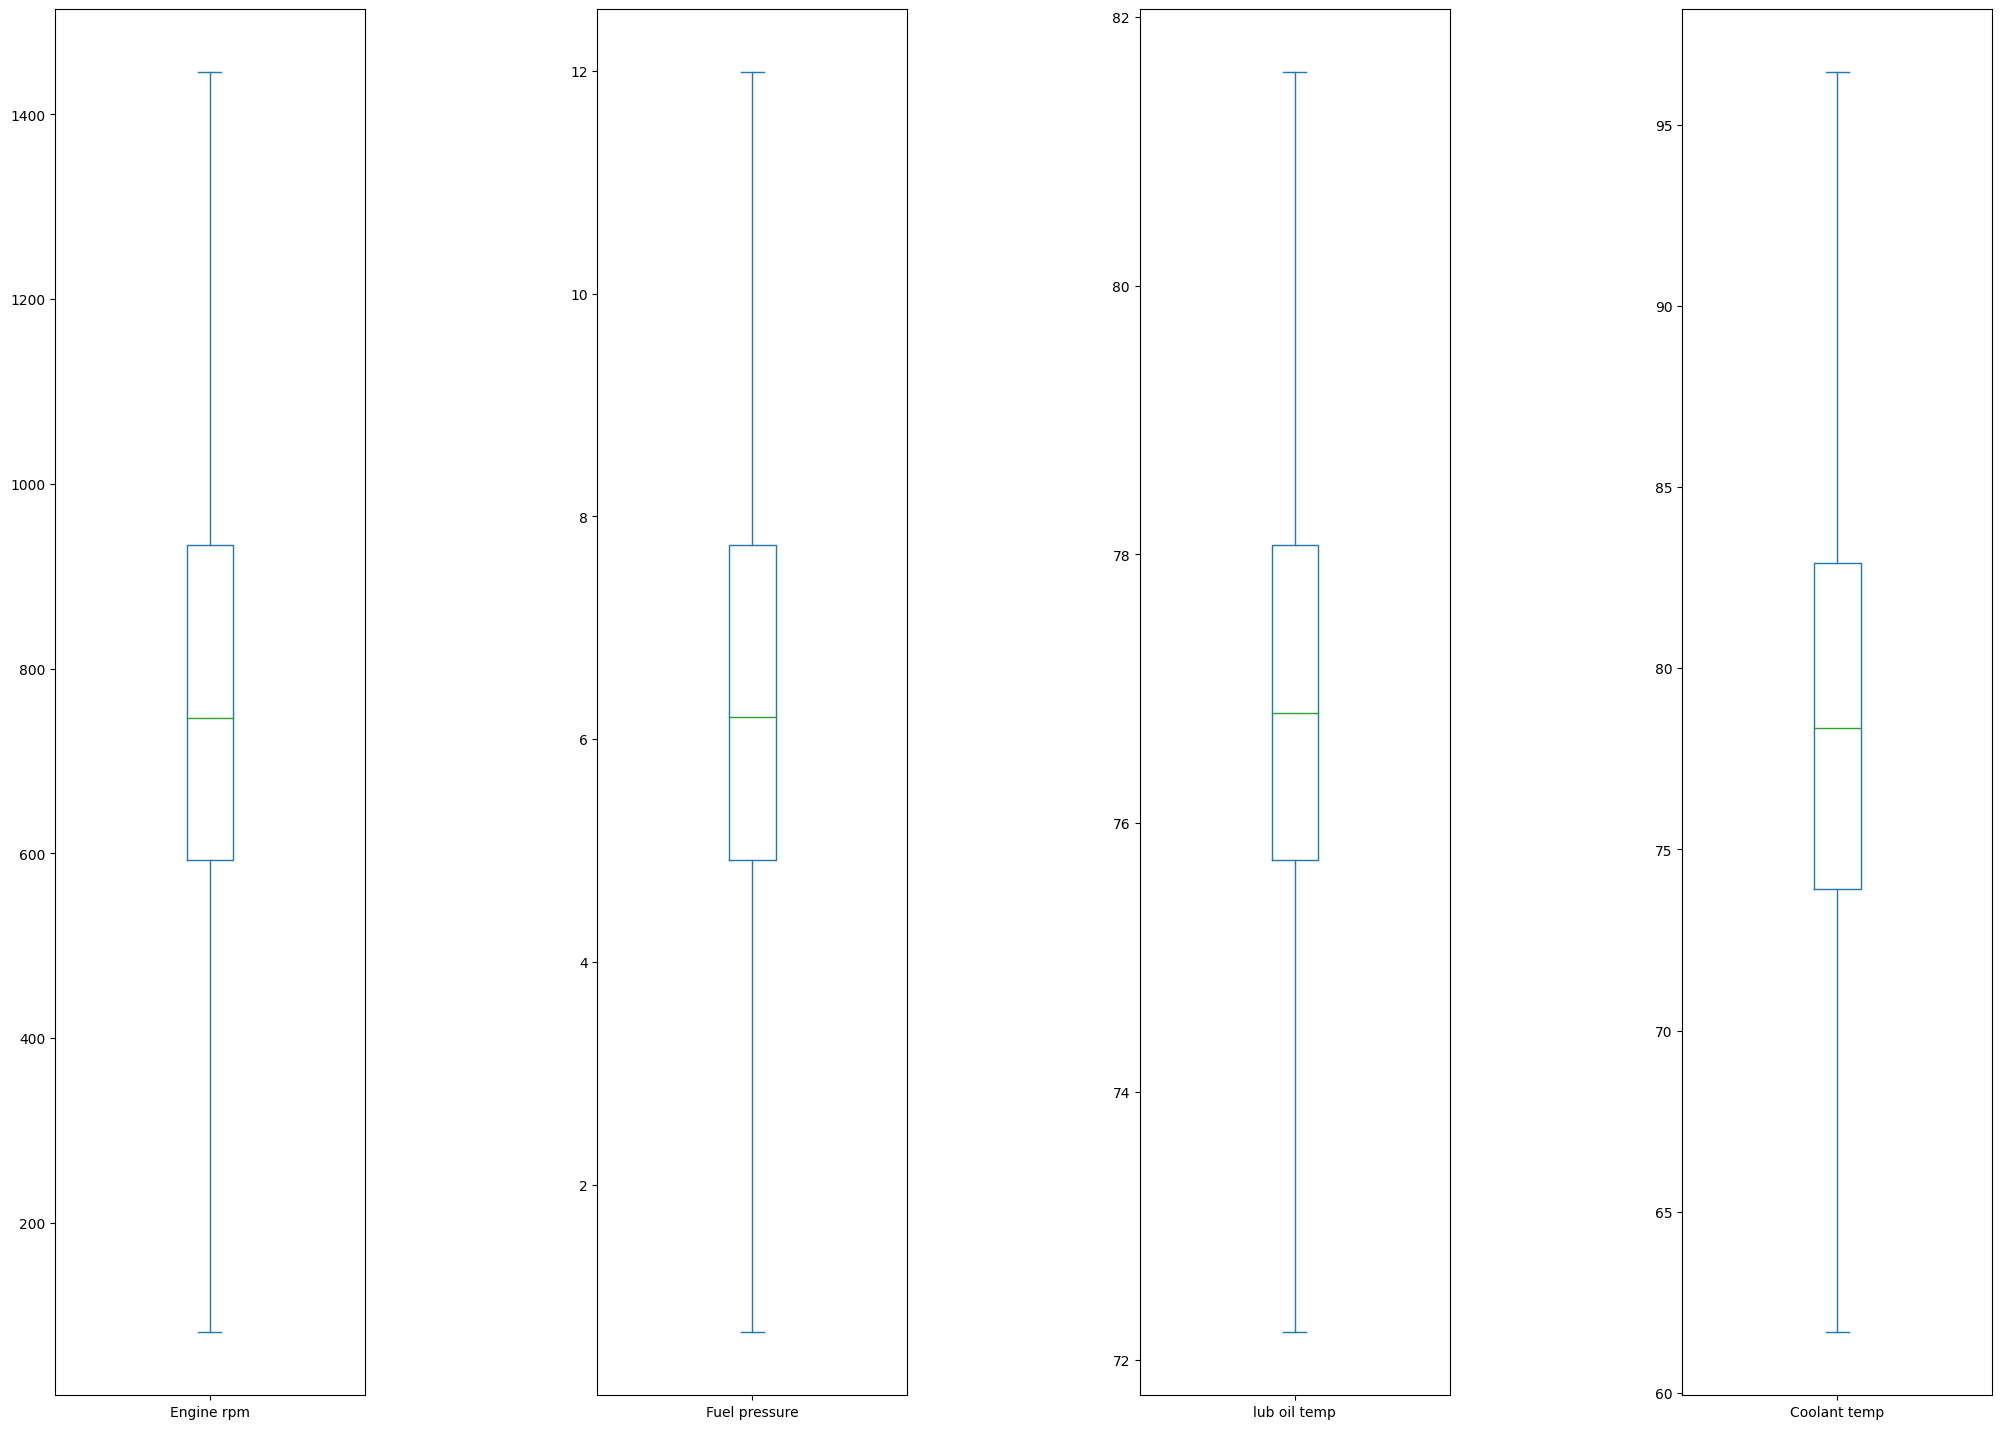

In [ ]:
# Boxplot
cleandata.plot(kind = 'box', subplots = True, sharey = False, figsize = (25, 18))
plt.subplots_adjust(wspace = 0.75) # ws is the width of the padding between subplots, as a fraction of the average Axes width.
plt.show()


In [ ]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer


In [ ]:
#  Step 9: Data Scaling

# all columns have very distince ranges and need scaling for better machine learning

## Scaling with MinMaxScaler
scale_pipeline = Pipeline([('scale', MinMaxScaler())])

scale_columntransfer = ColumnTransformer([('scale', scale_pipeline, data.columns)]) # Skips the transformations for remaining columns

scale = scale_columntransfer.fit(cleandata)

# Save Minmax scaler pipeline model
joblib.dump(scale, 'minmax')

scaled_data = pd.DataFrame(scale.transform(cleandata), columns = data.columns)
scaled_data.describe()


,Engine rpm,Fuel pressure,lub oil temp,Coolant temp
count,19535.000000,19535.000000,19535.000000,19535.000000
mean,0.517961,0.517724,0.539033,0.481648
std,0.188996,0.212688,0.239084,0.176751
min,0.000000,0.000000,0.000000,0.000000
25%,0.375000,0.375000,0.375000,0.351492
50%,0.487170,0.488578,0.491315,0.479504
75%,0.625000,0.625000,0.625000,0.610895
max,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Add 'Engine Condition' column to scaled data
scaled_data = pd.concat([scaled_data, df['Engine Condition']], axis=1)


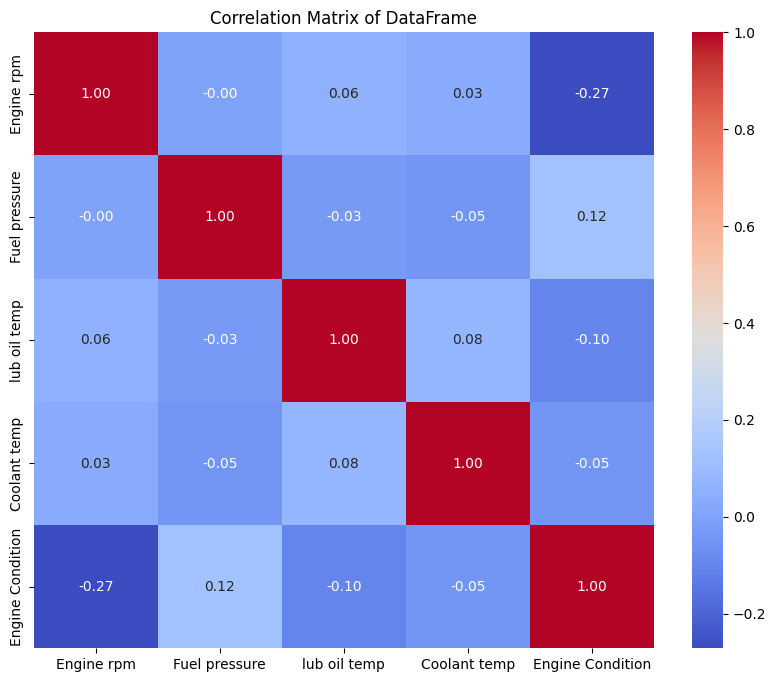

In [ ]:
import seaborn as sns
#  Step 10: Data corelation diagram

correlation_matrix = scaled_data.corr()
# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of DataFrame')
plt.show()


In [ ]:
pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 21.0 MB/s eta 0:00:00


In [ ]:
# All columns have relatively low corelation
# Engine condition is negatively corelated to Engine rpm, lube oil temperature and Coolant temp
# Engine condition is positively corelated to Fuel pressure

#Auto EDA Libraries
import sweetviz as sv

# Assuming 'df' is your DataFrame
my_report = sv.analyze([df, "data"])
my_report.show_html('Report.html')


                                             |          | [  0%]   00:00 -> (? left)

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
pip install autoviz


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.8/433.8 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 71.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 50.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 48.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.8/20.8 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.3/87.3 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 61.0 MB/s eta 0:00:00
  Attempting uninstall: param
    Found existing installation: param 2.1.0
    Uninstalling param-2.1.0:
      Suc

In [ ]:

from autoviz.AutoViz_Class import AutoViz_Class
import os

AV = AutoViz_Class()

import os
os.getcwd()

a = AV.AutoViz("Engine_Condition Prediction.csv", depVar = 'Engine Condition')


Imported v0.1.808. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
    pandas ascii encoder does not work for this file. Continuing...
    pandas utf-8 encoder does not work for this file. Continuing...
    pandas iso-8859-1 encoder does not work for this file. Continuing...
    pandas cp1252 encoder does not work for this file. Continuing...
    pandas latin1 encoder does not work for this file. Continuing...
Not able to read or load file. Please check your inputs and try again...


In [ ]:
#Model building ######
from sklearn.model_selection import train_test_split
# def function for  validate model for accuracy, Roc auc & F1 Score
def model_test(y_test,y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    auc_score = roc_auc_score(y_test, y_pred)
    print("ROC AUC Score:", auc_score)
    f1 = f1_score(y_test, y_pred)
    print("F1 Score:", f1)

# Preparing data
X = scaled_data.drop(columns=['Engine Condition'])
y = scaled_data['Engine Condition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
pip install --upgrade scikit-learn


In [ ]:
# useing Lazy Predict to test a lot of basic models to understand
# which models works better without any parameter tuning.
import lazypredict
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)
print(predictions)



 97%|█████████▋| 28/29 [01:23<00:03,  3.77s/it]

[LightGBM] [Info] Number of positive: 9869, number of negative: 5759
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000830 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 15628, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.631495 -> initscore=0.538635
[LightGBM] [Info] Start training from score 0.538635


100%|██████████| 29/29 [01:24<00:00,  2.90s/it]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                  0.64          0.63          0.63      0.64     
Perceptron                       0.65          0.60          0.60      0.64     
RandomForestClassifier           0.64          0.59          0.59      0.62     
AdaBoostClassifier               0.65          0.59          0.59      0.63     
ExtraTreesClassifier             0.64          0.59          0.59      0.62     
BaggingClassifier                0.61          0.59          0.59      0.61     
LGBMClassifier                   0.65          0.58          0.58      0.62     
XGBClassifier                    0.64          0.58          0.58      0.62     
BernoulliNB                      0.64          0.58          0.58      0.62     
LogisticRegression               0.65          0.58          0.58      0.62     
LinearDiscriminantAnalysis  

In [ ]:
from sklearn.neighbors import NearestCentroid
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
###  NearestCentroid

# Create a NearestCentroid classifier
clf = NearestCentroid()
# Define the hyperparameters grid
param_grid = {'metric': ['euclidean', 'manhattan', 'minkowski', 'cosine']}
# Perform grid search
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)
# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
# Make predictions using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
# Calculate accuracy
model_test(y_test,y_pred)



Best hyperparameters: {'metric': 'euclidean'}
Accuracy: 0.6337343230099821
ROC AUC Score: 0.6246493199747343
F1 Score: 0.6932475884244373


In [ ]:
from sklearn.linear_model import Perceptron
##Perceptron

# Create a Perceptron classifier
clf = Perceptron()
# Define the hyperparameters grid
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1],  # Learning rate
    'max_iter': [100, 500, 1000, 2000],    # Maximum number of iterations
    'tol': [1e-3, 1e-4, 1e-5]              # Tolerance for stopping criteria
}
# Perform grid search
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)
# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
# Make predictions using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
# Calculate accuracy
model_test(y_test,y_pred)



Best hyperparameters: {'alpha': 0.0001, 'max_iter': 100, 'tol': 0.0001}
Accuracy: 0.5909905298182749
ROC AUC Score: 0.6288910783641763
F1 Score: 0.5948275862068966


In [ ]:
from sklearn.ensemble import RandomForestClassifier

###  Random Forest

random_forest = RandomForestClassifier(n_estimators=100,
                                       max_depth=10,
                                       min_samples_split=10,
                                       min_samples_leaf=1,
                                       max_features='log2',
                                       random_state=42)
# Train the Random Forest Classifier
random_forest.fit(X_train, y_train)
# Predict on the test data
y_pred = random_forest.predict(X_test)
# Evaluate the accuracy of the model
model_test(y_test,y_pred)



Accuracy: 0.6467878167391861
ROC AUC Score: 0.5846694172299947
F1 Score: 0.7465099191770757


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(random_forest, X, y, cv=5)
# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
# Calculate and print the mean cross-validation score
mean_cv_score = cv_scores.mean()
print("Mean Cross-Validation Score:", mean_cv_score)


Cross-Validation Scores: [0.65549015 0.66163297 0.66572818 0.65190683 0.66931149]
Mean Cross-Validation Score: 0.6608139237266444


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
###  AdaBoost classifier

# Create AdaBoost classifier
clf = AdaBoostClassifier(random_state=42)
# Define the hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    # You can also specify different base estimators
    # 'base_estimator': [DecisionTreeClassifier(max_depth=1), RandomForestClassifier()]
}
# Perform grid search
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)
# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
# Make predictions using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
# Calculate accuracy
model_test(y_test,y_pred)



Best hyperparameters: {'learning_rate': 1.0, 'n_estimators': 50}
Accuracy: 0.6496032761709751
ROC AUC Score: 0.5870546013699061
F1 Score: 0.7489455345681276


In [ ]:
 import xgboost as xgb
 #XGBoosting

xgb_classifier = xgb.XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3)
# Train the XGBoost Classifier
xgb_classifier.fit(X_train, y_train)
# Predict on the test data
y_pred = xgb_classifier.predict(X_test)
# Evaluate the accuracy of the model
model_test(y_test,y_pred)



Accuracy: 0.6567699001791656
ROC AUC Score: 0.5933273640733423
F1 Score: 0.7549789877580851


In [ ]:
### BernoulliNB
from sklearn.naive_bayes import BernoulliNB

clf = BernoulliNB()
# Train the classifier
clf.fit(X_train, y_train)
# Make predictions
y_pred = clf.predict(X_test)
# Calculate accuracy
model_test(y_test,y_pred)



Accuracy: 0.6270796007166624
ROC AUC Score: 0.5012392094146317
F1 Score: 0.7703703703703704


In [ ]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=1000)
# Train the classifier
clf.fit(X_train, y_train)
# Make predictions
y_pred = clf.predict(X_test)
# Calculate accuracy
model_test(y_test,y_pred)


Accuracy: 0.6521627847453288
ROC AUC Score: 0.5777440117010935
F1 Score: 0.7584858716900658


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.21410910867805896


In [ ]:
#Use H2o  model for predicting vehicle maintenance
!apt-get install default-jre


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  default-jre-headless fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libfontenc1 libxkbfile1 libxtst6 libxxf86dga1 openjdk-11-jre x11-utils
Suggested packages:
  mesa-utils
The following NEW packages will be installed:
  default-jre default-jre-headless fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libfontenc1 libxkbfile1 libxtst6 libxxf86dga1 openjdk-11-jre x11-utils
0 upgraded, 12 newly installed, 0 to remove and 45 not upgraded.
Need to get 3,720 kB of archives.
After this operation, 12.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 default-jre-headless amd64 2:1.11-72build2 [3,042 B]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxtst6 amd64 2:1.2.3-1build4 [13.4 kB]
Get:3 http://archive.ubuntu.com

In [ ]:
!pip install h2o
#Model building using h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 3.3 MB/s eta 0:00:00


In [ ]:
import h2o
h2o.init()


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp2vob42dz
  JVM stdout: /tmp/tmp2vob42dz/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp2vob42dz/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,07 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_71hfe8
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
import h2o
from h2o.estimators import H2OGradientBoostingEstimator, H2ORandomForestEstimator, H2ODeepLearningEstimator
import pandas as pd

# Initialize H2O
h2o.init()

# Load data
data_pd = pd.read_csv("/content/drive/MyDrive/Engine_data/Engine_Condition Prediction.csv")
data_h2o = h2o.H2OFrame(data_pd)

# Split data into train and test sets
train_h2o, test_h2o = data_h2o.split_frame(ratios=[0.8], seed=1234)

# Define features and target
features = train_h2o.columns[:-1]  # All columns except the last one
target = train_h2o.columns[-1]  # Last column name (assuming it's the target)

# Train Gradient Boosting Machine model
gbm_model = H2OGradientBoostingEstimator()
gbm_model.train(x=features, y=target, training_frame=train_h2o)

# Train Random Forest model
rf_model = H2ORandomForestEstimator()
rf_model.train(x=features, y=target, training_frame=train_h2o)

# Train Deep Learning model
dl_model = H2ODeepLearningEstimator()
dl_model.train(x=features, y=target, training_frame=train_h2o)

# Evaluate model performances
gbm_performance = gbm_model.model_performance(test_data=test_h2o)
rf_performance = rf_model.model_performance(test_data=test_h2o)
dl_performance = dl_model.model_performance(test_data=test_h2o)

print("Gradient Boosting Machine performance:")
print(gbm_performance)

print("Random Forest performance:")
print(rf_performance)

print("Deep Learning performance:")
print(dl_performance)

# Shutdown H2O
h2o.shutdown()


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp7nj_ccxv
  JVM stdout: /tmp/tmp7nj_ccxv/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp7nj_ccxv/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_6y5r21
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
Gradient Boosting Machine performance:
ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 0.2091844511589491
RMSE: 0.45736686714162966
MAE: 0.4140251879793233
RMSLE: 0.32115246418027804
Mean Residual Deviance: 0.2091844511589491
Random Forest performance:
ModelMetricsRegression: drf
** Reported on test data. **

MSE: 0.21659669417994737
RMSE: 0.4653994995484496
MAE: 0.4176733391524387
RMSLE: 0.325193896188101
Mean Residual Deviance: 0.21659669417994737
Deep Learning performance:
ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 0.20989655790555875
RMSE: 0.458144691015359
MAE: 0.4